<a href="https://colab.research.google.com/github/Eng-Manal10/1st-task--5th-week/blob/main/2end_of_Time_Series_Forecasting_Practical_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [1]:
# Here is a helping code that will download and unzip the dataset for you.
# Once you download the dataset you may comment the code!
#!kaggle datasets download -d khaledzsa/traffic-dataset
#!unzip traffic-dataset.zip

import pandas as pd

In [7]:
from google.colab import drive
drive.mount('/content/drive')



df = pd.read_csv('/content/drive/MyDrive/T5-TWI/Traffic Data.csv',
index_col ='date_time',
                       parse_dates = True
)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
print(df.columns)

Index(['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all',
       'weather_main', 'weather_description'],
      dtype='object')


In [9]:
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
date_time,,,,,,,
2017-08-27 01:00:00,1209.0,291.15,0.0,0.0,90,Mist,mist
2018-09-06 23:00:00,1248.0,286.01,0.0,0.0,1,Clear,sky is clear
2017-08-25 18:00:00,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds
2017-11-09 22:00:00,2838.0,262.35,0.0,0.0,1,Clear,sky is clear
2017-11-09 15:00:00,5794.0,267.08,0.0,0.0,5,Clear,sky is clear


In [10]:
df['date'] = df.index.date
df['time'] = df.index.time


In [11]:
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date,time
date_time,,,,,,,,,
2017-08-27 01:00:00,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27,01:00:00
2018-09-06 23:00:00,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06,23:00:00
2017-08-25 18:00:00,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25,18:00:00
2017-11-09 22:00:00,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09,22:00:00
2017-11-09 15:00:00,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09,15:00:00


## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

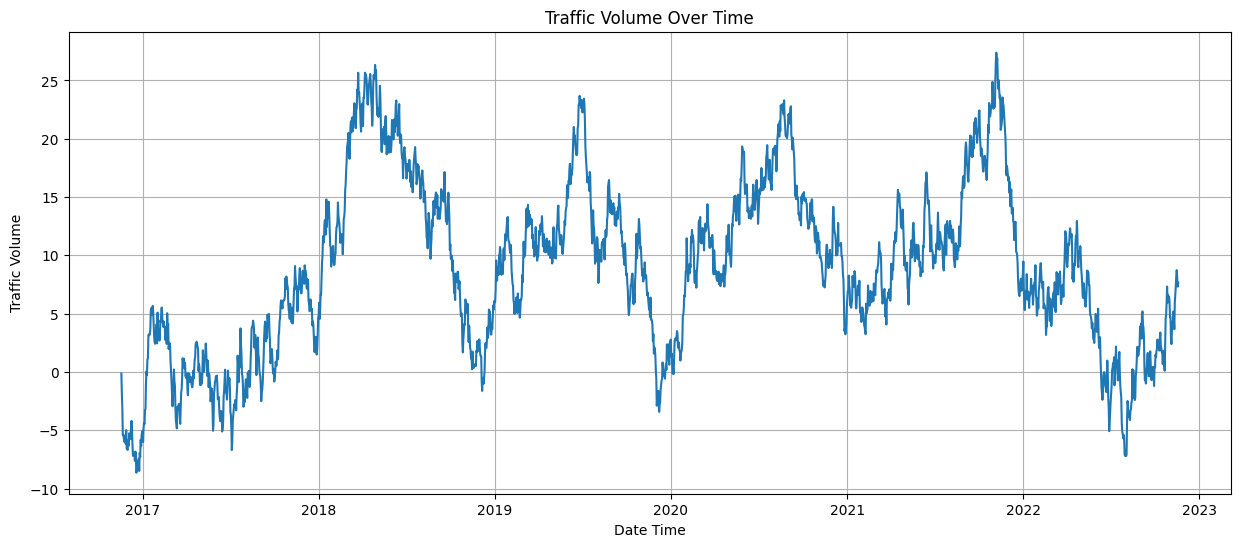

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(df['traffic_volume'])
plt.title('Traffic Volume Over Time')
plt.xlabel('Date Time')
plt.ylabel('Traffic Volume')
plt.grid(True)
plt.show()


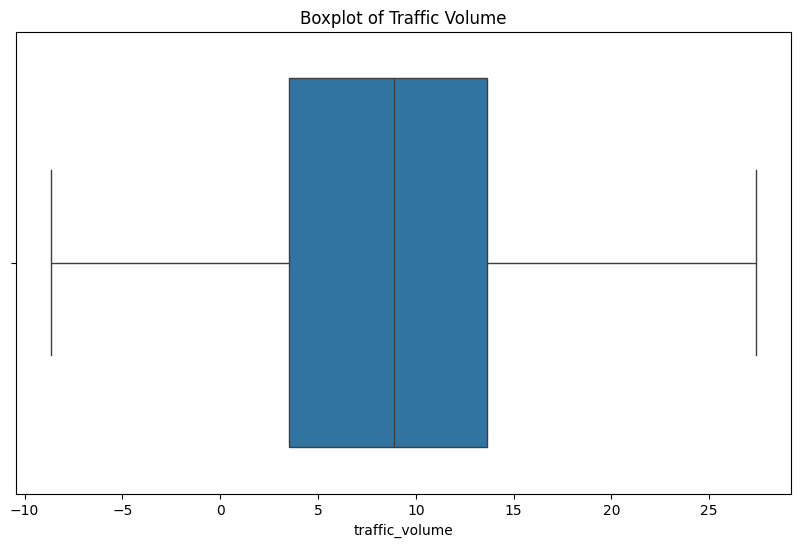

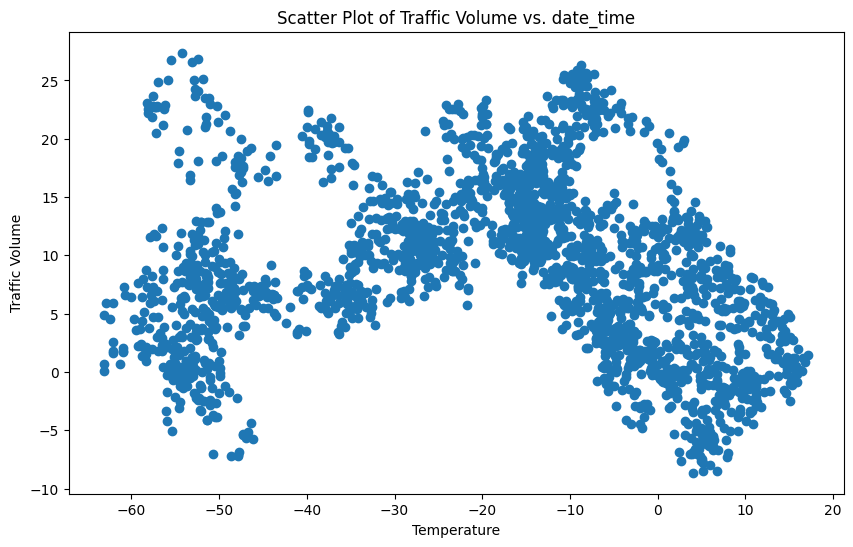

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for traffic volume
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['traffic_volume'])
plt.title('Boxplot of Traffic Volume')
plt.show()

# Scatter plot of traffic volume against temperature
plt.figure(figsize=(10, 6))
plt.scatter(df['temp'], df['traffic_volume'])
plt.xlabel('Temperature')
plt.ylabel('Traffic Volume')
plt.title('Scatter Plot of Traffic Volume vs. date_time')
plt.show()

<Figure size 1500x1000 with 0 Axes>

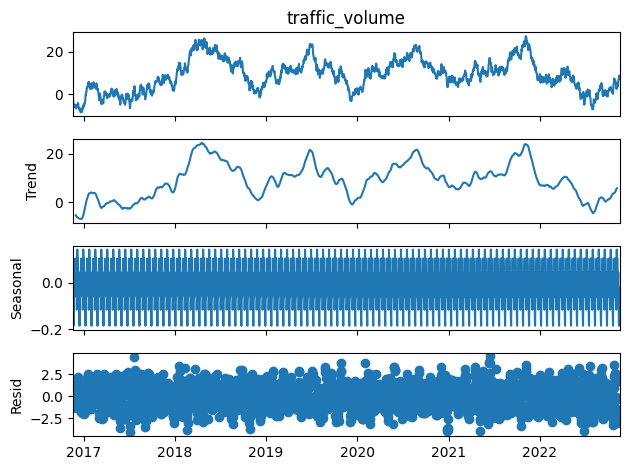

In [46]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(df['traffic_volume'], model='additive', period=24)

# Plot the decomposed components
plt.figure(figsize=(15, 10))
decomposition.plot()
plt.show()

Trend Component:
count    2168.000000
mean        8.993996
std         7.057429
min        -6.883459
25%         3.594222
50%         9.356163
75%        13.364652
max        24.464737
Name: trend, dtype: float64


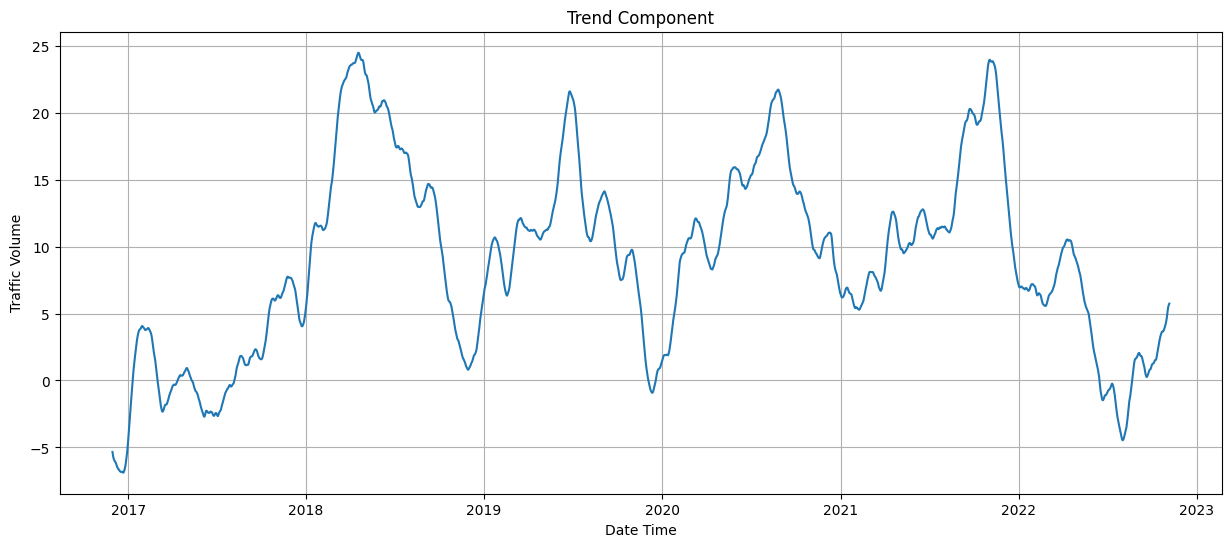


Seasonal Component:
count    2192.000000
mean       -0.000246
std         0.084911
min        -0.185899
25%        -0.062517
50%         0.002018
75%         0.055877
max         0.143008
Name: seasonal, dtype: float64


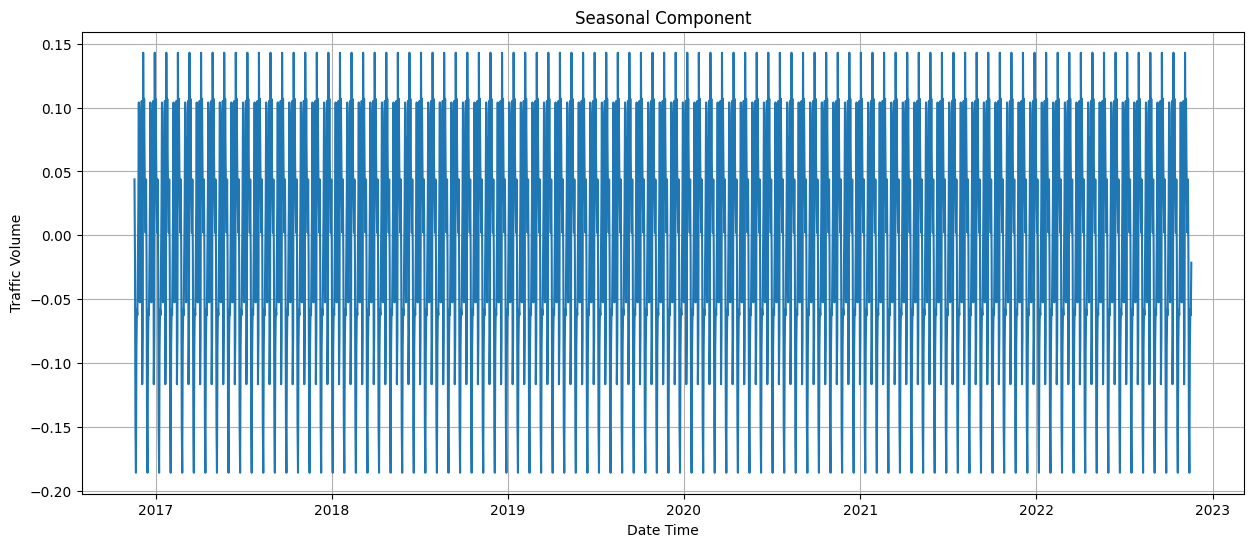


Residual Component:
count    2168.000000
mean       -0.002277
std         1.372956
min        -4.122515
25%        -0.956941
50%        -0.006102
75%         0.961811
max         4.519398
Name: resid, dtype: float64


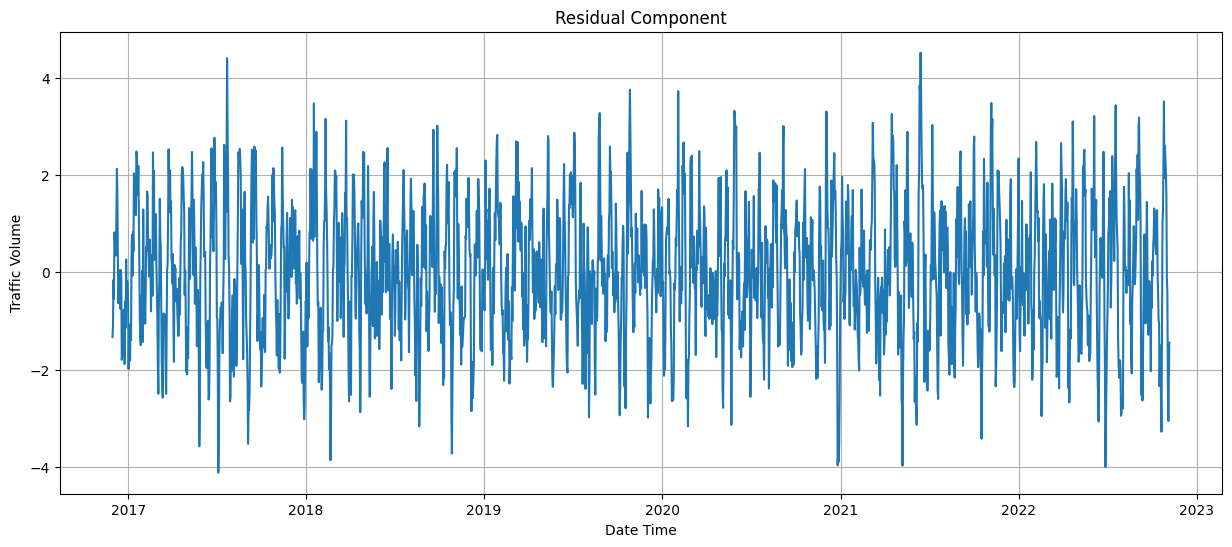

In [47]:
import matplotlib.pyplot as plt
# 1 Analyze the trend component
print("Trend Component:")
print(decomposition.trend.describe())
# Plot the trend component
plt.figure(figsize=(15, 6))
plt.plot(decomposition.trend)
plt.title('Trend Component')
plt.xlabel('Date Time')
plt.ylabel('Traffic Volume')
plt.grid(True)
plt.show()

# 2 Analyze the seasonal component
print("\nSeasonal Component:")
print(decomposition.seasonal.describe())
# Plot the seasonal component
plt.figure(figsize=(15, 6))
plt.plot(decomposition.seasonal)
plt.title('Seasonal Component')
plt.xlabel('Date Time')
plt.ylabel('Traffic Volume')
plt.grid(True)
plt.show()

# 3 Analyze the residual component
print("\nResidual Component:")
print(decomposition.resid.describe())
# Plot the residual component
plt.figure(figsize=(15, 6))
plt.plot(decomposition.resid)
plt.title('Residual Component')
plt.xlabel('Date Time')
plt.ylabel('Traffic Volume')
plt.grid(True)
plt.show()


## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

In [48]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values (with mean or median)
df.fillna(df.mean(), inplace=True)

# Verify if missing values are handled
print(df.isnull().sum())

date_time         0
traffic_volume    0
temp              0
rain_1h           0
snow_1h           0
dtype: int64
date_time         0
traffic_volume    0
temp              0
rain_1h           0
snow_1h           0
dtype: int64


In [51]:
print(df[df['traffic_volume'] == 0])

Empty DataFrame
Columns: [date_time, traffic_volume, temp, rain_1h, snow_1h]
Index: []


In [52]:
# Create lag features
df['traffic_volume_lag1'] = df['traffic_volume'].shift(1)
df['traffic_volume_lag2'] = df['traffic_volume'].shift(2)

# Create moving average features
df['traffic_volume_rolling_mean'] = df['traffic_volume'].rolling(window=3).mean()

# Drop rows with missing values after creating lag features
df.dropna(inplace=True)

In [53]:
df.sort_index(inplace=True)

In [54]:
print(df[df['traffic_volume'] == 0])

Empty DataFrame
Columns: [date_time, traffic_volume, temp, rain_1h, snow_1h, traffic_volume_lag1, traffic_volume_lag2, traffic_volume_rolling_mean]
Index: []


## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [57]:
df['prev_traffic_volume'] = df['traffic_volume'].shift(1)

print(df.columns)

Index(['date_time', 'traffic_volume', 'temp', 'rain_1h', 'snow_1h',
       'traffic_volume_lag1', 'traffic_volume_lag2',
       'traffic_volume_rolling_mean', 'prev_traffic_volume'],
      dtype='object')


In [118]:
# Calculate the difference between traffic volume values
df['traffic_volume_diff'] = df['traffic_volume'].diff()

In [120]:
# Extract date features
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month
df['day_of_year'] = df.index.dayofyear


## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [ ]:
# Split the data into training and testing sets
train_size = int(len(df) * 0.75)
train_data = df[:train_size]
test_data = df[train_size:]

In [64]:
data_dict = {'date': pd.DatetimeIndex(['2015','2016','2017','2018','2019', '2020']),
             'traffic_volume': [1001, 2000, 3000, 4000, 5000,6000]}

# Convert the dictionary to a Pandas DataFrame
data = pd.DataFrame(data_dict)
# Decide on the split ratio (80% train, 20% test)
train_size = int(len(data) * 0.8)
test_size = len(data) - train_size

# Split the data while maintaining the time order
train_data = data.iloc[:train_size]

In [69]:
print(train_size)

4


In [71]:
test_data = data.iloc[train_size:]

In [70]:
#print test_size

print(test_size)

2


## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

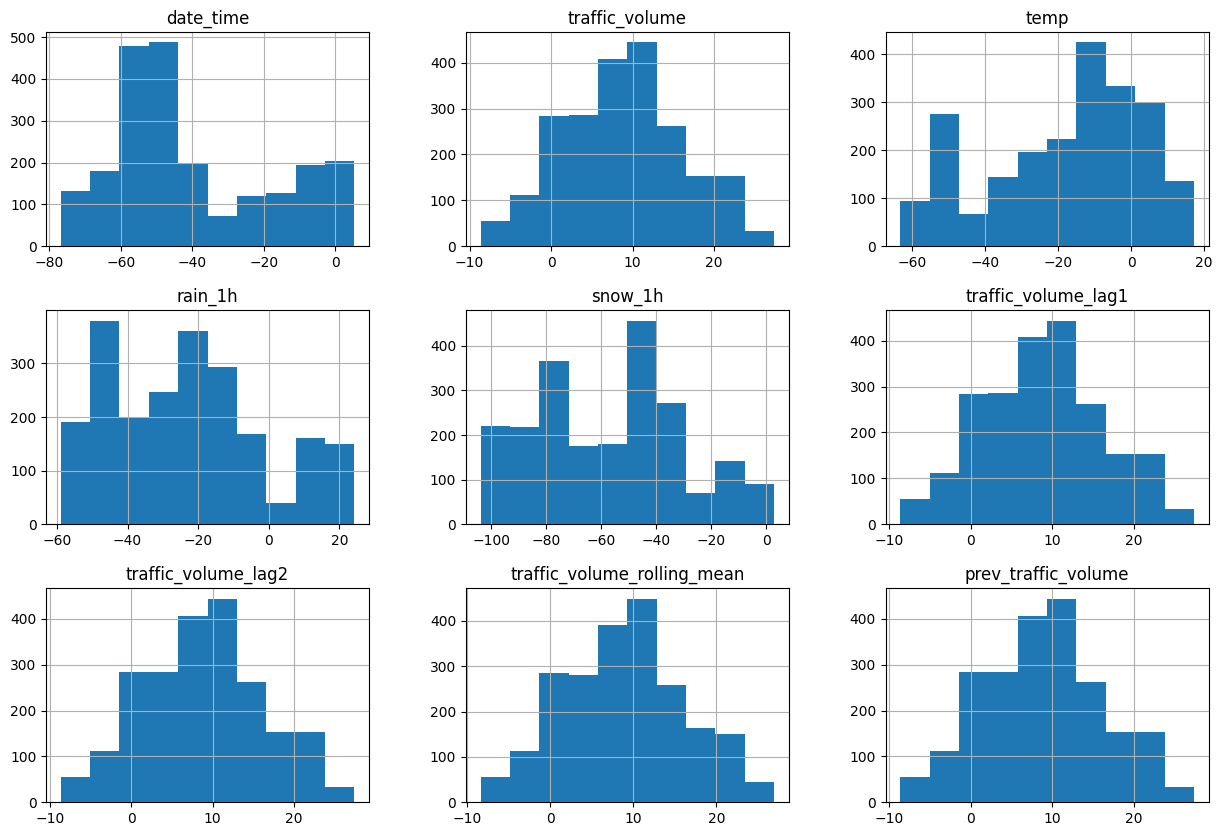

In [74]:
#Apply feature scaling:
import matplotlib.pyplot as plt
# Check the distribution of your features.
df.hist(figsize=(15, 10))
plt.show()

In [78]:
from sklearn.preprocessing import MinMaxScaler

# Define the columns to scale first
features_to_scale = [ 'rain_1h', 'snow_1h', 'clouds_all']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform it
#train_data[features_to_scale] = scaler.fit_transform(train_data[features_to_scale])

# Transform the testing data using the fitted scaler
#test_data[features_to_scale] = scaler.transform(test_data[features_to_scale])

## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

# **1) I will try Arima:**

In [85]:
#Split data into train / test sets
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:] #one year(12 months) for testing

In [84]:
!pip install pmdarima
from pmdarima.arima import auto_arima

stepwise_fit = auto_arima(df['traffic_volume'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',
                          suppress_warnings = True,
                          stepwise = True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=13.06 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=11287.534, Time=0.13 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=7000.848, Time=4.14 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=9422.114, Time=3.11 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=11286.460, Time=0.13 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=7611.442, Time=0.38 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=6790.498, Time=12.88 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=29.08 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=13.87 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=11279.473, Time=5.03 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=6792.185, Time=15.38 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=6792.212, Time=15.69 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=9423.872, Time=9.27 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=6794.058, Time=27.02 sec
 ARIMA(1,0,0)(2,1,0)[12]

In [87]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['traffic_volume'],
                order = (0, 1, 1),
                seasonal_order =(2, 1, 1, 12))

result = model.fit()
result.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                     traffic_volume   No. Observations:                 2178
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood               -3106.007
Date:                            Sun, 25 Aug 2024   AIC                           6222.015
Time:                                    07:42:54   BIC                           6250.415
Sample:                                11-20-2016   HQIC                          6232.401
                                     - 11-06-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0264      0.022     -1.192      0.233      -0.070       0.017
ar.S.L12      -0.0041      0.021     -0.193      0.847      -0.045       0.037
ar.S.L24       0.0158      0.021      0.734      0.463      -0.026       0.058
ma.S.L12      -0.9998      0.283     -3.536      0.000      -1.554      -0.446
sigma2         1.0029      0.282      3.552      0.000       0.449       1.556
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.06
Prob(Q):                              0.95   Prob(JB):                         0.59
Heteroskedasticity (H):               1.08   Skew:                             0.02
Prob(H) (two-sided):                  0.29   Kurtosis:                         2.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [88]:
start = len(train)
end = len(train) + len(test) - 1

# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='date'>

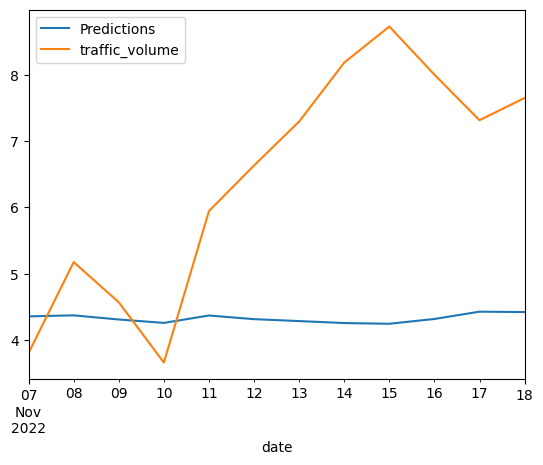

In [90]:
predictions.plot(legend = True)
test['traffic_volume'].plot(legend = True)

### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [95]:

from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
# Calculate mean squared error
rmse(test['traffic_volume'], predictions)
# Calculate mean squared error
mean_squared_error(test["traffic_volume"], predictions)

7.182992682958623

### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

# ***#2end Model LSTM***

In [96]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [100]:
# fix random seed for reproducibility
tf.random.set_seed(7)
dataframe = pd.DataFrame(values)
dataset = dataframe.values
dataset = dataset.astype('float32')

In [102]:
#Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [105]:
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

1753 439


#convert an array of values into a dataset matrix

In [106]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [107]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [108]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [109]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1751/1751 - 4s - 2ms/step - loss: 0.0272
Epoch 2/10
1751/1751 - 4s - 2ms/step - loss: 2.7043e-04
Epoch 3/10
1751/1751 - 4s - 2ms/step - loss: 1.5663e-04
Epoch 4/10
1751/1751 - 3s - 1ms/step - loss: 1.5987e-04
Epoch 5/10
1751/1751 - 2s - 1ms/step - loss: 1.6203e-04
Epoch 6/10
1751/1751 - 3s - 2ms/step - loss: 1.6238e-04
Epoch 7/10
1751/1751 - 4s - 2ms/step - loss: 1.6222e-04
Epoch 8/10
1751/1751 - 2s - 1ms/step - loss: 1.6199e-04
Epoch 9/10
1751/1751 - 3s - 1ms/step - loss: 1.6177e-04
Epoch 10/10
1751/1751 - 3s - 1ms/step - loss: 1.6156e-04


### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [116]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [115]:
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.01 RMSE
Test Score: 0.01 RMSE


## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

1)I did create an lag feature ,moving average and then I drop rows with missing values after creating lag.

2) In here I did shift method , Calculate the difference,Extract date features

For quitions num 3-7) First model I did used Arima (Best model:  ARIMA(1,0,0)(2,1,0)[12]          
Total fit time: 215.298 seconds and it seems not the best model as the pred :7.182992682958623

2end model it' LSTM , the lyers I make it 4 with look back and the dense 1 , th loss fun Idid used mean_squared_error and the epoch I choose 10cas the time is runnig and Ican't make it more ;).

And it seemes the good model for the data as the Train Score: 0.01 RMSE
Test Score: 0.01 RMSE.